# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [32]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("C:/Users/a0062133/Documents/udacity/machine-learning-master/machine-learning-master/projects/customer_segments/customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [33]:
print(data.head())
data.shape

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


(440, 6)

In [34]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [35]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [57,206,370]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5417,9933,10487,38,7572,1282
1,6373,780,950,878,288,285
2,39679,3944,4955,1364,523,2235


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


# **Answer:**

**Customers 57: Restaurants/Cafe Shop**

* This customer has high consumption of Milk and Detergents_Paper. He look like to have an own establishment that receive many people every day, so need have food stock and need to keep the place clean. We can see a high consumption of Grocery that may be used for immediate consumption. Here, the fresh food consumption is below the mean, meaning the focus is on rotated food or the fresh food is cheaper in another place.

**Customers 206: Neighborhood Reseller**

* This customer has a small use all category, probably he is a neighborhood reseller that has a small convenience shop or small retail. He has focus on Fresh category and almost does not work with Milk and Delicatessen category because it can require stock place.

** Customers 370: Restaurant/Reseller**

* This customer has high use of Fresh and Delicatessen category. He can be a Reseller like the costumer 206 or can be a restaurant. The category Fresh is important for restaurant that has high order request and need be ready to make fast food while delicatessen can be seller as dessert. About the reseller, they can work with a kind of Business-to-Business Company (buying cheap and reselling). 


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [36]:
## Analisys of 'Detergents_Paper'##
#--------------------------------------------------------------------
#--------------------------------------------------------------------
#--------------------------------------------------------------------
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis=1, inplace = False)
feature_dropped='Detergents_Paper'
labels=data[feature_dropped]

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25 , random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print ("Score:",score)

Score: 0.728655181254


In [37]:
regressor.feature_importances_

array([ 0.03067553,  0.0265184 ,  0.90405291,  0.01581276,  0.0229404 ])

In [11]:
## Analisys of 'Fresh'##
#--------------------------------------------------------------------
#--------------------------------------------------------------------
#--------------------------------------------------------------------

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Fresh'], axis=1, inplace = False)
feature_dropped='Fresh'
labels=data[feature_dropped]

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25 , random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print ("Score:",score)

Score: -0.252469807688


In [12]:
regressor.feature_importances_

array([ 0.17933073,  0.14508791,  0.45990587,  0.09072922,  0.12494626])

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

** Which feature did you attempt to predict? **

* I attempted to predict the 'Detergents_ Paper' feature that for me has a high correlation with the manipulation of food.

** What was the reported prediction score? **

* It was 0.73% (0.728655181254)

** Is this feature necessary for identifying customers' spending habits?**

* No, it is not. The high score implies that 'Detergents_Paper' can be estimated by features of the training set, so the amount of information necessary for a model can be provided by other features because they are well correlated. About the Fresh feature, that has a weight of -0.25, it is more crucial to keep because this feature has unique amount of information.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

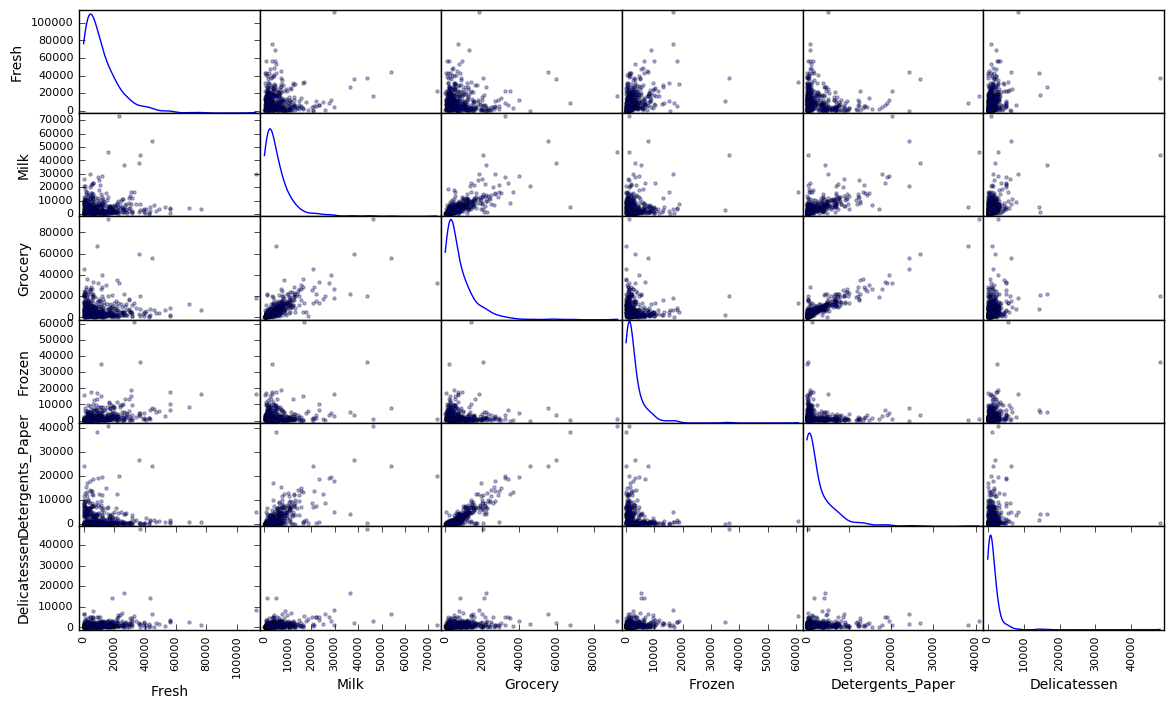

In [38]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

{'boxes': [<matplotlib.lines.Line2D at 0x1da48557048>],
 'caps': [<matplotlib.lines.Line2D at 0x1da4855d860>,
 'fliers': [<matplotlib.lines.Line2D at 0x1da48041a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1da48041240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1da48557828>,
  <matplotlib.lines.Line2D at 0x1da48557ef0>]}

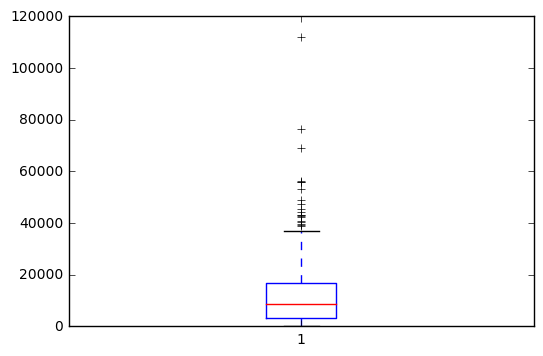

In [9]:
plt.boxplot(data["Fresh"],0)

{'boxes': [<matplotlib.lines.Line2D at 0x1da4808f0b8>],
 'caps': [<matplotlib.lines.Line2D at 0x1da48096ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1da4809ccc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1da4809c4a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1da4808fa58>,
  <matplotlib.lines.Line2D at 0x1da4808fbe0>]}

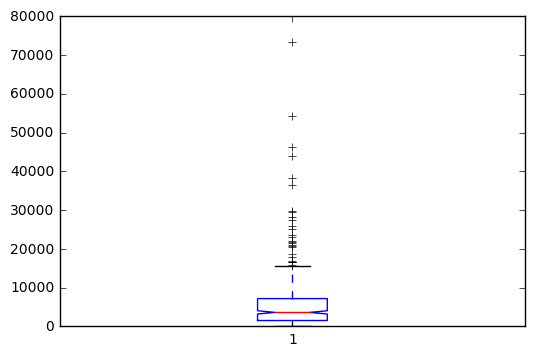

In [10]:
plt.boxplot(data["Milk"], 1)

{'boxes': [<matplotlib.lines.Line2D at 0x1da48102a20>],
 'caps': [<matplotlib.lines.Line2D at 0x1da48109da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1da48114cf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1da48110e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1da48102c50>,
  <matplotlib.lines.Line2D at 0x1da48109c18>]}

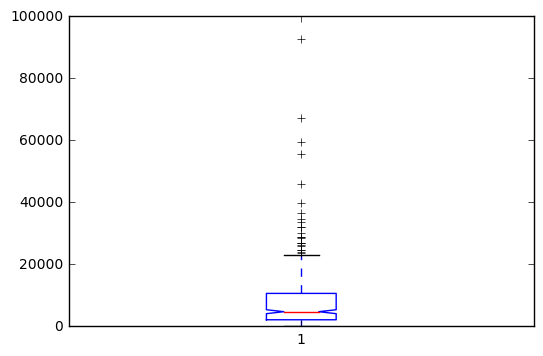

In [11]:
plt.boxplot(data["Grocery"], 1)

{'boxes': [<matplotlib.lines.Line2D at 0x1da48165748>],
 'caps': [<matplotlib.lines.Line2D at 0x1da4816dac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1da48179a20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1da48173b38>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1da48165978>,
  <matplotlib.lines.Line2D at 0x1da4816d940>]}

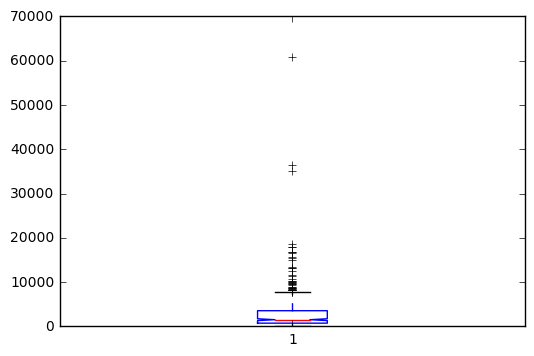

In [12]:
plt.boxplot(data["Frozen"], 1)

{'boxes': [<matplotlib.lines.Line2D at 0x1da481de518>],
 'caps': [<matplotlib.lines.Line2D at 0x1da481e5ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1da481ef7b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1da481eb8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1da481deeb8>,
  <matplotlib.lines.Line2D at 0x1da481defd0>]}

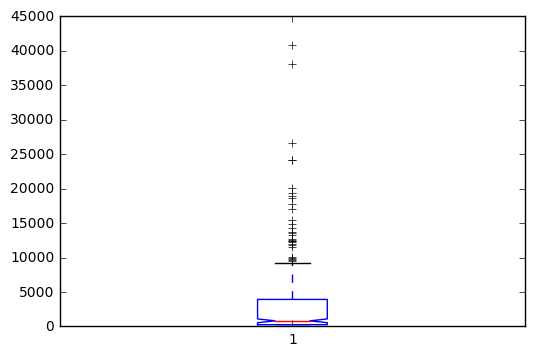

In [13]:
plt.boxplot(data["Detergents_Paper"], 1)

{'boxes': [<matplotlib.lines.Line2D at 0x1da4824ce10>],
 'caps': [<matplotlib.lines.Line2D at 0x1da4825a828>,
 'fliers': [<matplotlib.lines.Line2D at 0x1da4825efd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1da4825e208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1da4824cf98>,
  <matplotlib.lines.Line2D at 0x1da48253ef0>]}

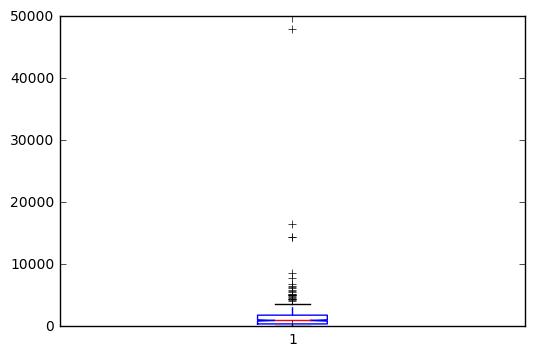

In [14]:
plt.boxplot(data["Delicatessen"], 1)

In [39]:
print(data.corr())

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

** Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.** 
* Using the scatter matrix, we can see that all features have a long tail and the curve of Delicatessin and Frozen category have the smaller head. We can assume that the features are not fitted by a normal curve in this row structure (without manipulation). All features have a lot of outlier points, meaning that we need clean these observations from our unsupervised model. We can observe positive correlation like happens with Detergents_Paper and Grocery, Grocery and Milk and some correlation that are smaller like Fresh and milk. Backing to the fact that Delicatessen and Frozen have the smaller head, meaning that we have a large numbers of points near 0 causing a small variance in this category.

** Are there any pairs of features which exhibit some degree of correlation? ** 
* Yes, There are. All of features has a degree of correlation, one can be strong other can be weak. In this case Grocery and Detergents_Paper has correlation of  0.728335 that for me is a high correlation.

** Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? ** 
* This confirm my suspicious about the relevance of the feature that I attempted to predict.

** How is the data for those features distributed?** 
* The data contains outliers and we can see a positive correlation as we look at the matrix correlation graph following a simple rule, as more is spent in Grocery more is spent in Detergents_Paper.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

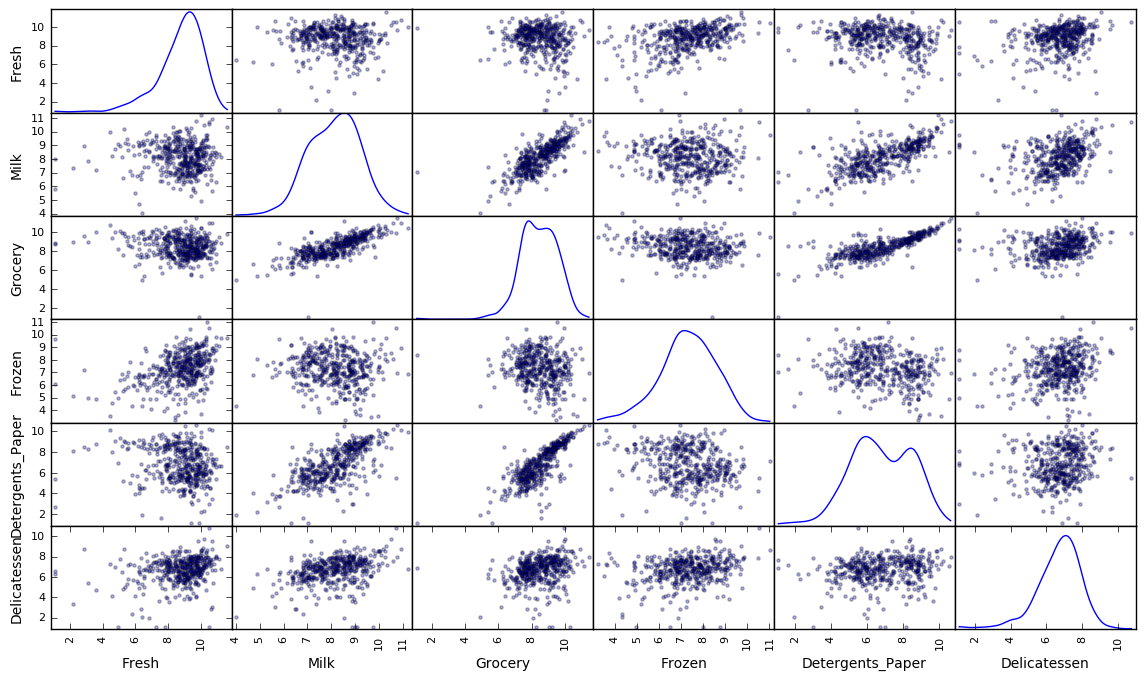

In [40]:
# TODO: Scale the data using the natural logarithm
log_data =  np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [41]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
1,8.759826,6.659294,6.856462,6.777647,5.662960,5.652489
2,10.588577,8.279951,8.508152,7.218177,6.259581,7.711997


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [42]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
      
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
   
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    
   # outliers = 0
    outliers += feature_outliers.index.tolist()

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print ("Number of outliers (inc duplicates): ", len(outliers))
print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Number of outliers (inc duplicates):  62
New dataset with removed outliers has 398 samples with 6 features each.


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

There are more then one data point as outlier in more than one feature as follow:

* data point 154: An outlier for Delicatessen, Milk and Grocery.

* data point 128: An outlier for Delicatessen and Fresh.

* data point 75: An outlier for Detergents_Paper and Grocery.

* data point 66: An outlier for Delicatessen and Fresh

* data point 65: An outlier for Frozen and Fresh

I actually would remove these points because they are little compared to the full table and it helps to reduce the potential of skewing our results. All of the outliers are out of the interquartile range, most of those outliers are above of superior limit of what we considered as normal data.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


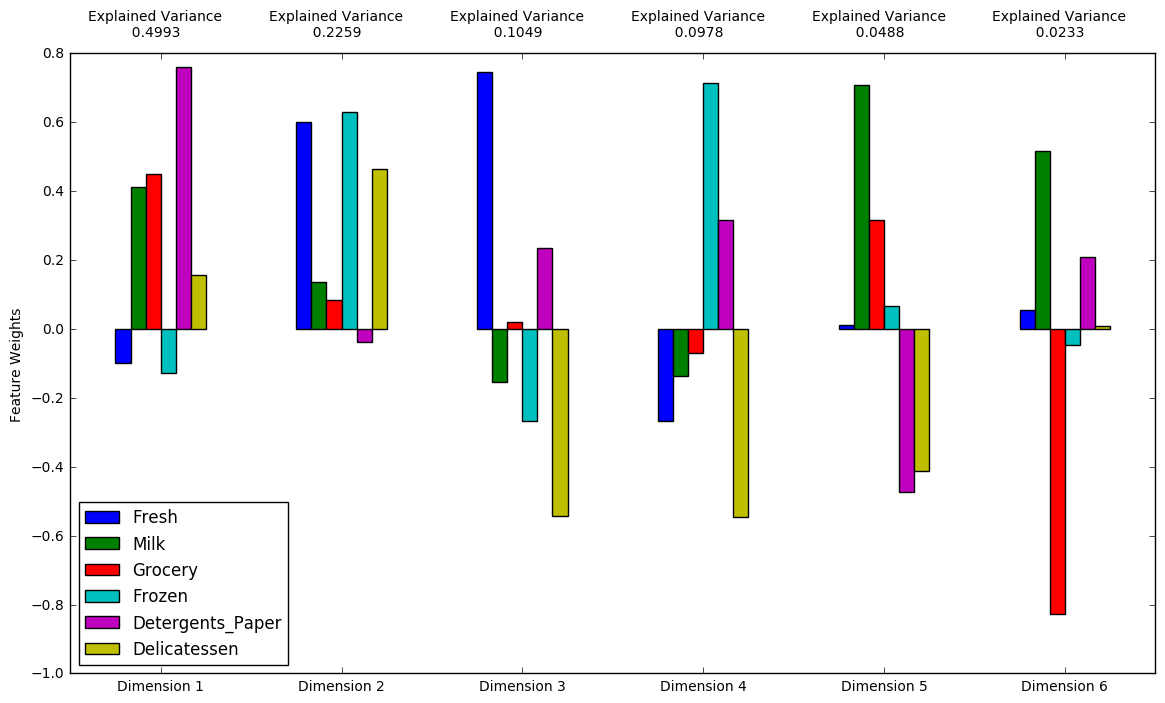

In [61]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6) # random_state only available from 0.18.0 onwards
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples =  pca.transform(log_samples)

# Generate PCA results plot
explained_var=pca.explained_variance_ratio_
totl=0

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)


print (np.cumsum(pca_results['Explained Variance']))

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

** How much variance in the data is explained in total by the first and second principal component? **

* The first principal component explains 49% of the total variance and the second explains 22%. In total, the first and the second component principal together explain 72% of the total variance.

** How much variance in the data is explained by the first four principal components? **

* The first four principal components explains ~ 93% of the total variance

** Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.**

 * 1st PC:
    The first principal components is explained meanly by Detergents_Paper feature followed by Grocery and Milk, both with positive weights. Delicatessen has the smaller positive weights. Fresh and Milk contribute with negative weights. This cluster can represents a convenience shop and supermarket.
    
    2st PC:
    The second principal component looks to be orthogonal to the first with Fresh, Delicatessen and Frozen being the features with high positive weights and the others features can contribute with small weights (all positives). This cluster can represents a restaurant that needs fresh food and Delicatessen for desserts.
    
    3st PC: 
    The third principal component has Fresh and Delicatessen with bigger weights. Fresh feature has a positive weight while the Delicatessen has the bigger negative weight. Frozen and Detergents_Paper has an important role with their respective weights and the others features are quite little. This cluster can represents a convenience and some kind of groceries shop that needs fresh food and less delicatessen.
    
    4st PC:
    The fourth main component is characterized by two features: Frozen features, that has a positive weight and shortly thereafter, Delicatessen has a high negative weight. This cluster can represent restaurants that buy monthly and stocks some foods.



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [45]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0265,-2.2869,0.9229,-2.3395,-0.3863,0.4764
1,-2.2404,-1.3381,0.5972,0.1639,-0.5711,0.3110
2,-0.2861,1.3328,0.6492,-1.2828,0.0199,0.0067


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.128,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.630,-0.0376,0.4634


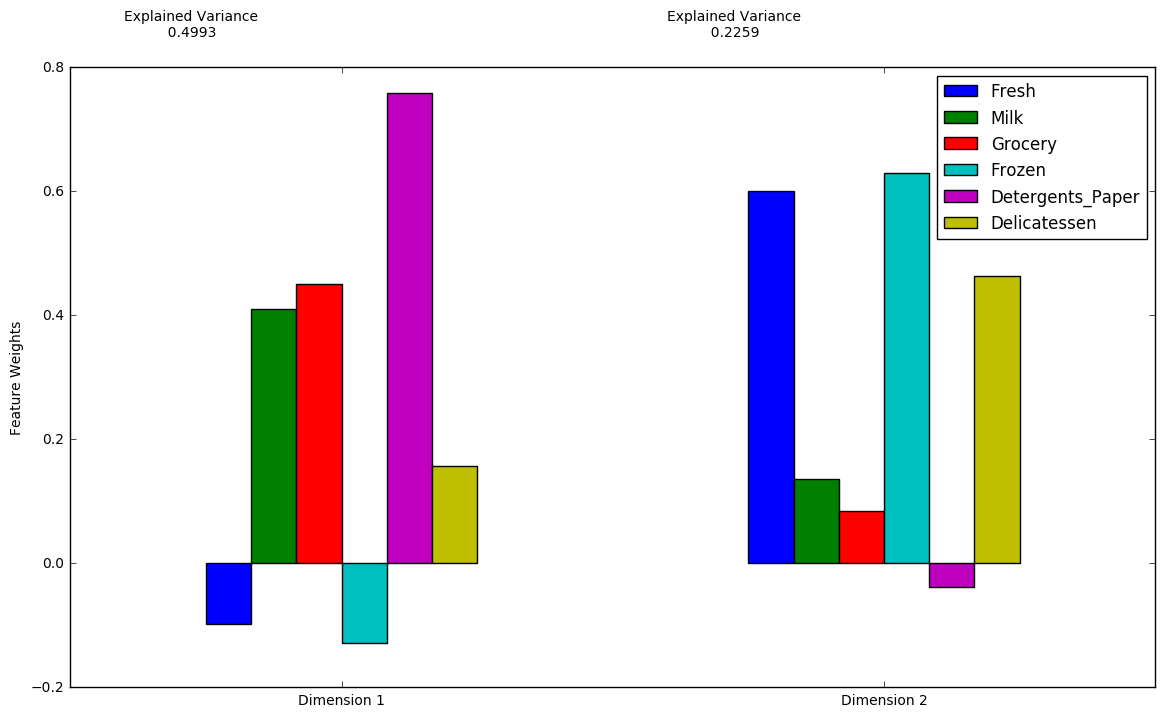

In [64]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [65]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0265,-2.2869
1,-2.2404,-1.3381
2,-0.2861,1.3328


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

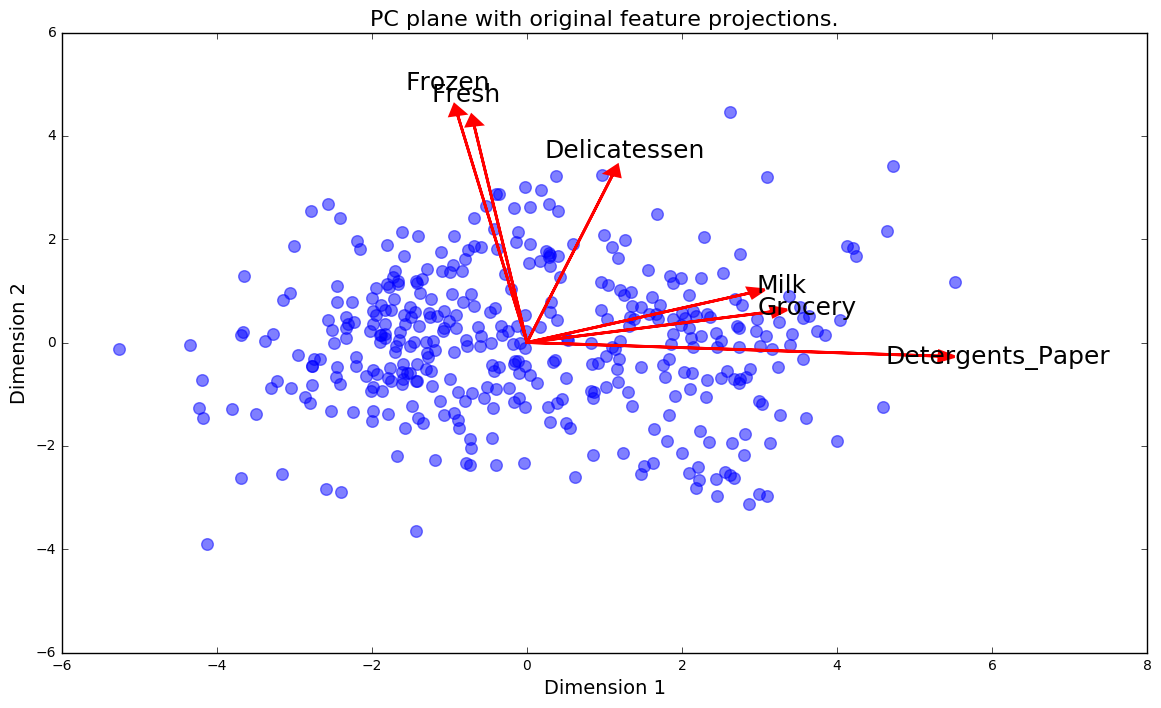

In [66]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

**What are the advantages to using a K-Means clustering algorithm? **
* I can describe some advantages like, if the number of cluster are knowed the k-means can scale well and can performance in large sample of data. K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. Because of the classification, each data points rigidly belong to one cluster or another, this hard classification  can defining the meaning of hard cluster. In most of the problem, we can compute de distance as linear that let easy for k-means understand the data and also has fewer parameters that let the algorithm understand more easily.

**What are the advantages to using a Gaussian Mixture Model clustering algorithm? **
* Mixture Models would let us determine some groups without associating each sample with a cluster (soft cluster). These groups are defined by distributions with unknown parameters, for learning these parameters, Expectation-Maximization is used. As an advantage, the algorithm does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well. Another advantage is that GMM does not bias the cluster sizes to have specific structures as does by K-Means (Circular). As a disadvantage, GMM uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high.
https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian

**Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?**

* Looking at the graph of two dimension we cannot see clear cluster and the points has a slight density tending to have a non-spherical cluster what tell me to use Mixture Model. In this case we can work with a probability of each point belong to each cluster, deciding where each costumer will be future in analysis. We don´t have much data and I think that a non-spherical cluster can distingue more in this case, so I intend to use the Gaussian Mixture Model.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [67]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

def produceGMM(k):
    global clusterer, preds, centers, sample_preds

    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer =  GMM(n_components=k,random_state=0).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,16):
    score = produceGMM(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results)


Number of Clusters,Silhouette Score
2,0.443601
3,0.357295
4,0.291646
5,0.265822
6,0.307123
7,0.295333
8,0.301156
9,0.283717
10,0.262954
11,0.216130


### Question 7

* Report the silhouette score for several cluster numbers you tried.

* Of these, which number of clusters has the best silhouette score?

**Answer:**


* Report the silhouette score for several cluster numbers you tried.

| Number of Clusters | Silhouette Score |
| --- | --- |
| 2 | 0.443601   |
| 3 | 0.357295   |
| 4 | 0.291646   |
| 5 | 0.265822   |
| 6 | 0.307123   |
| 7 | 0.295333   |
| 8 | 0.301156   |
| 9 | 0.283717   |
| 10| 0.262954   |
| 11| 0.216130   |
| 12| 0.181104   |
| 13| 0.118361   |
| 14| 0.142389   |
| 15| 0.194378   |

** Of these, which number of clusters has the best silhouette score? **

*The best silhouette score is in cluster 2, it has 0.44 of silhouette score!


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

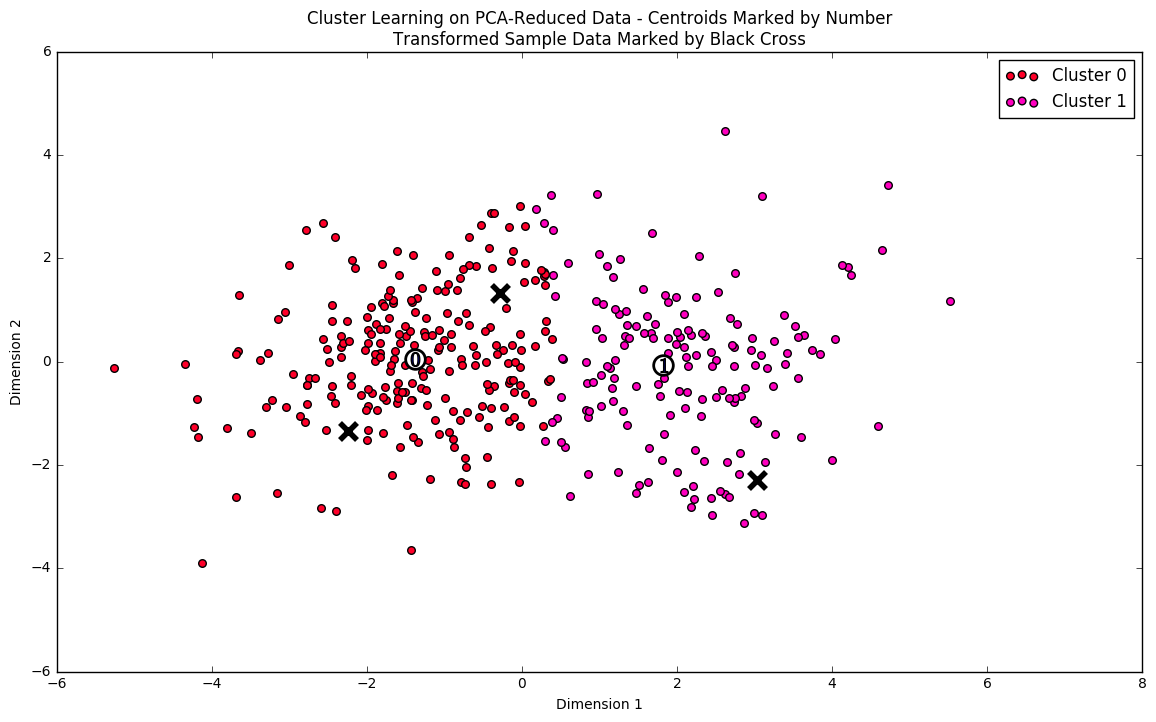

In [68]:

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer =  GMM(n_components=2,random_state=0).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

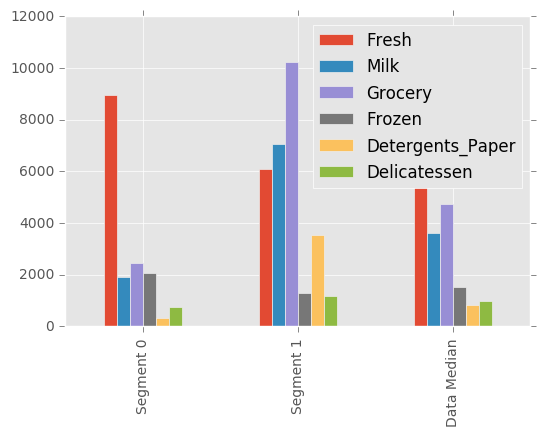

In [69]:
compare = true_centers.copy()
compare.loc[true_centers.shape[0]] = data.median()

plt.style.use('ggplot')
compare.plot(kind='bar')
labels = true_centers.index.values.tolist()
labels.append("Data Median")
plt.xticks(range(compare.shape[0]),labels)
plt.show()

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [70]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [71]:
# remenber description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**

** Cluster/Segment 0:**
* This cluster has smaller numbers, always below the mean of the features meaning this cluster are probably a neighborhood reseller or small convenience shops.

** Cluster/Segment 1:** 
* This Segment likely represents cafe shops and restaurants where have Grocery and high use of Detergents_Papers to keep the place clean and comfortable.


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [72]:
display(samples)

# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5417,9933,10487,38,7572,1282
1,6373,780,950,878,288,285
2,39679,3944,4955,1364,523,2235


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

* Sample point 0 is predicted to be in cluster 1. This cluster was initially labeled as a café shop and restaurants cluster. This is interesting, because my first describe of costumer 1 converge with the predicted. This costumer tends to have high consumption of Milk and Detergents_Paper as showed in respective features above. The predicted was not so bad.

* Sample point 1 and 2 are classified to be in the Cluster 0, that mean they are in the reseller/Retailer or small convenience shop. Sample point 2 looks more a reseller because the high consumption of Fresh and Delicatessen, on the other hand, sample 1 looks like be more convenience shops because it has a small use of all features. The prediction of costumer 2 and 1 converges with the cluster that it was attributed too.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

* Because of our analysis, we have defined two groups Segment 0 and Segment 1. The segment 1 are composed by café shops, restaurants and big convenience shop while the segment 0 are small supermarket that works as reseller and costumer that has small convenience shop, basically in retail segment.

    The wholesale can start selecting a perceptual statistically relevant of the population of each group and start make the delivery chances in this sample as testing.

    The segment 1 can face problems in store more products and machinery to let the foods fresher for longer times. This kind of problem can be negotiated with some discounts or other alternatives.
    
    The segment 0 can be more plausible in this changing. They have less consumption of all category annually letting easy make changes in business structure.

    After make this first step that is work with change in a sample of costumers, the wholesale can collect the feedback and works to adapt in their costumer needs. With some rounds of continuous improvement and adjusts the wholesale can change its delivery service from currently 5 days a week to 3 days a week to the entire customer-base.



### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

* The classification of the new costumers can be done training a supervised learning, we can use the well-known features from our initial table with the costumers' segment that we calculated as target variable. With this method we can build a classifier rule that are applied in this 10 new costumer with their provided estimates for anticipated annual spending of each product category. We can use several algorithm to do that, like linear/multilinear regression or even SVM and all boosting method that we have learned.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

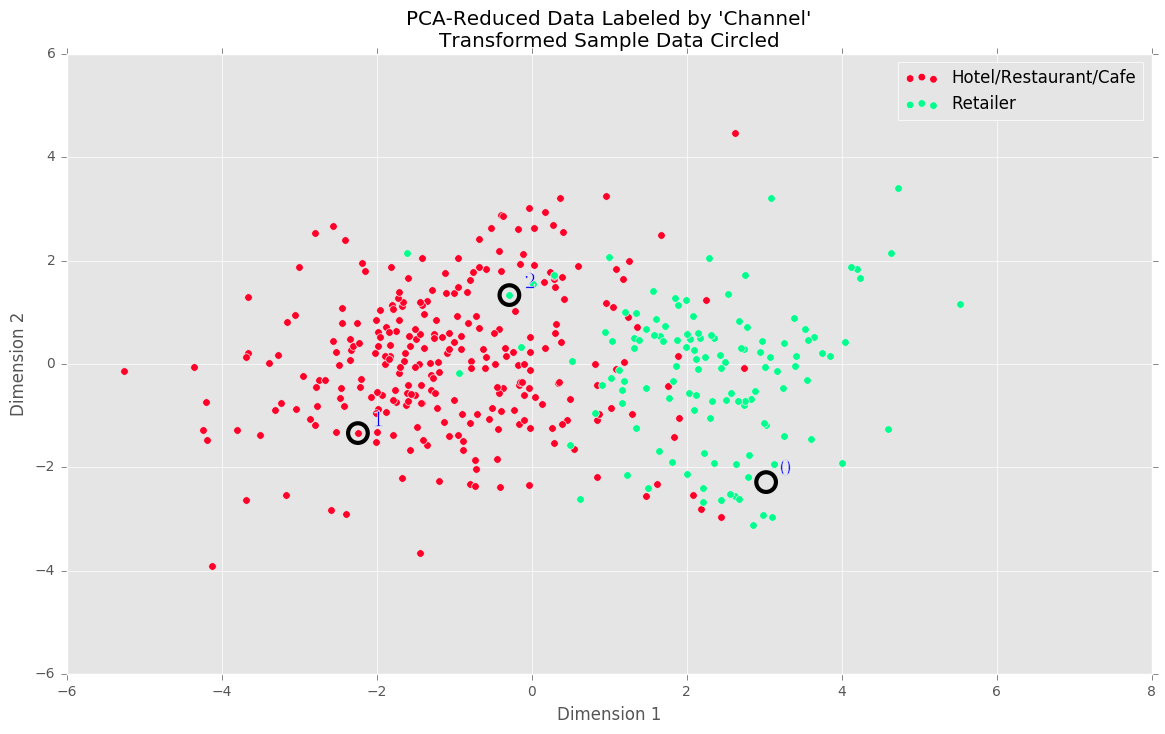

In [73]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**


**How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? **
* Following the rules on this script, when we have maximized the Silhouette Score, I got 2 cluster. After a deep analysis, I think that this cluster are very similar comparing to this distribution of Hotel/Restaurant/Cafe customers to Retailer customers. I think the border between my cluster are more accuracy, in the graph above we have some retailer inside the 'Hotels/Restaurants/Cafes' area.

** Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? **

* In this case we are working with a soft cluster that works with a probability of a costumer be in one of the cluster. So, I think I can say that there are segments that are more likely to be in 'Retailers' or 'Hotels / Restaurants / Cafes' and not as purely 'Retailers' or 'Hotels / Restaurants / Cafes'.

**Would you consider these classifications as consistent with your previous definition of the customer segments?**
* Yes, I would. The first costumer (costumer 0) was initially described as a restaurant or cafe shop costumer. The classification was because the high consumption of Milk and Detergents_Paper.

    The second and third costumer was described as being a reseller or a small supermarket because of the small use of all category.

    I think this classification is not 100% correctly as I described before. I think that, my knowledge of what is a retailer is quite biased by several motives like the place I’m living right now, for example.  But I think is not so far.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.